# BAYES-LOSVD

This is a simple notebook that will guide you through the usage of the code
It consists on a number of steps:

- **Step 1: Compile codes**
  This is necessary to run the Stan codes
- **Step 2: Preprocess data**  
- **Step 3: Run code**
- **Step 4: Inspect results**
  
  

## STEP 1: Compile Stan codes

In [4]:
run "bayes-losvd_compile_codes.py"

               BAYES-LOSVD                 
             (compile codes)               



[ RUNNING ] stan_model/bayes-losvd_model_GH_full_series.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_GH_full_series.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_model_Bsplines.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_Bsplines.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_ghfit.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_ghfit.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_model_SP.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_SP.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_model_RW.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_RW.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_model_AR.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_AR.stan compiled.



## STEP 2: Preprocess data

In [1]:
run bayes-losvd_preproc_data.py -c ../config_files/example_preproc.properties

               BAYES-LOSVD                 
             (preproc_data)                



[ RUNNING ] NGC4550_SAURON

--------------------------------------------
- Input run name:   NGC4550_SAURON
- Survey:           SAURON_E3D
- Wavelength range: 4825.0-5300.0
- Target SNR:       150.0
- Min SNR:          3.0
- Redshift:         0.00153
- Velscale:         60.0
- LOSVD Vmax:       700.0
- Mask file:        emission_lines.mask
- Pol. order:       5
- Templates:        MILES_SSP
- Number of PCA:    5
--------------------------------------------

# Processing data .....
 - Reading the data and basic info
 - Correcting data for redshift
 - Cutting data to desired wavelength range
 - Computing the SNR of each spaxel
 - Selecting spaxels aboove SNR_min
 - Computing the Voronoi binning
 - 196 Voronoi bins required
 - Applying the Voronoi binning
 Progress [##################################################] 100.0% 

 - Log-rebinning and normalizing the spectra
 Progress [##################

## STEP 3: Run code

In [1]:
run bayes-losvd_run.py -f ../preproc_data/NGC4550_SAURON.hdf5 -b 0 -t SP -v 1

               BAYES-LOSVD                 
                  (run)                    

# Selected bins: 0


[ RUNNING ] NGC4550_SAURON - Bin: 0 - Fit type: SP

Using cached StanModel for stan_model/bayes-losvd_model_SP.stan

# Saving Stan summary: ../results/NGC4550_SAURON-SP/NGC4550_SAURON-SP_Stan_summary_bin0.txt

Inference for Stan model: anon_model_2a44c6d6be5ce9019f387951107a63da.
1 chains, each with iter=500; warmup=250; thin=1; 
post-warmup draws per chain=250, total post-warmup draws=250.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
losvd[1]   1.3e-3  8.5e-5 1.2e-3 5.4e-5 4.2e-4 9.2e-4 1.9e-3 4.9e-3    207    1.0
losvd[2]   1.3e-3  7.1e-5 1.4e-3 1.6e-5 4.1e-4 9.3e-4 2.0e-3 4.8e-3    377    1.0
losvd[3]   1.5e-3  7.9e-5 1.5e-3 3.0e-5 4.9e-4 1.0e-3 2.1e-3 5.3e-3    341    1.0
losvd[4]   2.0e-3  1.0e-4 1.8e-3 8.7e-5 7.0e-4 1.6e-3 3.0e-3 6.2e-3    296    1.0
losvd[5]   2.7e-3  1.2e-4 2.4e-3 6.9e-5 6.8e-4 2.3e-3 4.0e-3 8.6e-3    400    1.0
los

## STEP 4: Inspect results

               BAYES-LOSVD                 
             (inspect_fits)                


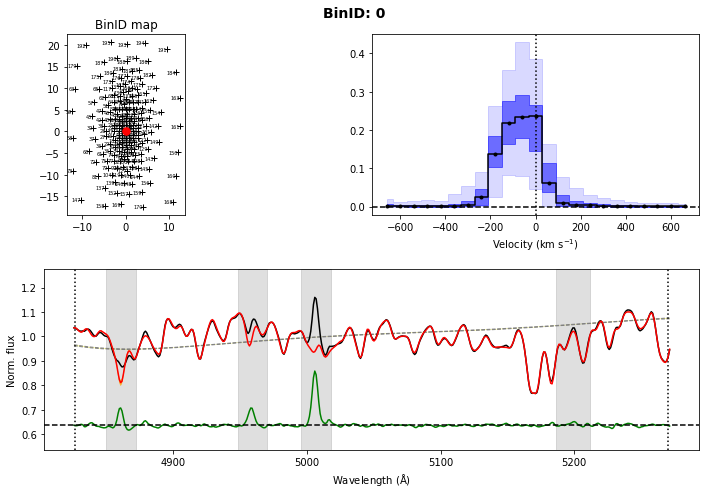



[ DONE ] NGC4550_SAURON-SP - Bin: 0



In [1]:
run bayes-losvd_inspect_fits.py -r NGC4550_SAURON-SP -b 0